In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Sat Dec 21 13:35:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
!pip install numpy==1.24.3 pandas==2.2.2 torch Pillow gradio diffusers transformers tensorflow==2.17.1


In [2]:
from diffusers import StableDiffusionImg2ImgPipeline, LMSDiscreteScheduler
import torch
from PIL import Image
import gradio as gr
import numpy as np

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
def predict(scheduler, prompt, image, strength, guidance_scale):

    pipeline = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion")

    if scheduler == "LMS":
      lms = LMSDiscreteScheduler.from_config(pipeline.scheduler.config)
      pipeline.scheduler = lms
      return pipeline(prompt=prompt, image=image.convert("RGB"), strength=strength, guidance_scale=guidance_scale).images[0]
    else:
      return pipeline(prompt=prompt, image=image.convert("RGB"), strength=strength, guidance_scale=guidance_scale).images[0]

In [4]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "nitrosocke/Ghibli-Diffusion"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "ghibli style magical princess with golden hair"
image = pipe(prompt).images[0]

image.save("./magical_princess.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

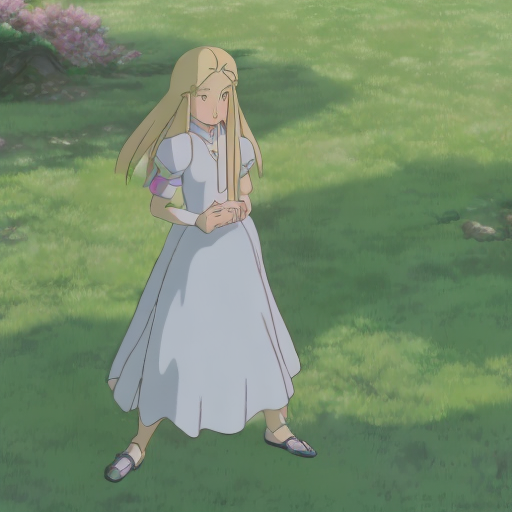

In [5]:
from IPython.display import Image, display

# Save the image temporarily
image_path = "/content/magical_princess.png"
# Create or save an image to the path (e.g., using a library like OpenCV or PIL)

# Display the image
display(Image(filename=image_path))

In [8]:
import gradio as gr

# Define the predict function
def predict(image):
    # Add the image processing logic here
    # For now, just return the input image as the output (for demonstration)
    return image

# Create the Gradio interface
gr.Interface(
    predict,  # The function to call when the interface is used
    inputs=gr.Image(type="pil"),  # Input: just an image
    outputs=gr.Image(),  # Output: generated image
    title="Simple Image-to-Image Generation",
).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://83a1601450fe95adba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a98193ce2f7b3e6672.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://83a1601450fe95adba.gradio.live
